In [73]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 18 17:44:24 2015

@author: suberlak
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os 
import re 
from sf_bin_statistics_exact_one_plot_L import read_file
from sf_bin_statistics_exact_one_plot_L import p_sigma_mu


pre_obj = ['StarB', 'StarR', 'QSO']
pre_mag = ['17-19', '18.5-19']
pre_corr = ['','_corr']

files_sig = {}

# Compare across all objects and 
# all mag ranges and 
# corrections

for obj in pre_obj : 
    for mag in pre_mag:
        for corr in pre_corr :
            pre = obj+'_bins_'+mag+corr
            fname = pre +'_N_max_sig_full_sig.txt'
            
            
            # check if the file exists
            if os.path.exists(fname) : 
                num_lines = sum(1 for line in open(fname))
            
                if num_lines == 200 : 
                    
                    #print 'Reading in the results ...\n'
                    d = np.genfromtxt(fname)
                    N = d[:,0]
                    sig_max = d[:,1]
                    sig_full = d[:,2]
                    
                    a = np.where(sig_max - sig_full != 0)
                    if np.size(a) > 0:
                        print '\nFor ',  fname 
                        print 'There is some discrepancy...'
                        ind = a[0]
                        print 'Affected bins: ', N[ind]
                        for i in range(len(ind)):
                            print sig_max[ind], sig_full[ind]
                        files_sig[fname] = [obj,mag,corr,N[ind], sig_max[ind], sig_full[ind]]
            # if not, go ahead with the comparison        
            else:
                print 'This file does not exist... ', fname
                





For  StarB_bins_18.5-19_corr_N_max_sig_full_sig.txt
There is some discrepancy...
Affected bins:  [ 114.  141.  178.]
[ 0.17948718  0.15384615  0.19230769] [ 0.19230769  0.16666667  0.20512821]
[ 0.17948718  0.15384615  0.19230769] [ 0.19230769  0.16666667  0.20512821]
[ 0.17948718  0.15384615  0.19230769] [ 0.19230769  0.16666667  0.20512821]

For  StarR_bins_18.5-19_N_max_sig_full_sig.txt
There is some discrepancy...
Affected bins:  [ 176.]
[ 0.12820513] [ 0.14102564]

For  StarR_bins_18.5-19_corr_N_max_sig_full_sig.txt
There is some discrepancy...
Affected bins:  [ 200.]
[ 0.12820513] [ 0.14102564]

For  QSO_bins_18.5-19_N_max_sig_full_sig.txt
There is some discrepancy...
Affected bins:  [ 178.]
[ 0.29487179] [ 0.30769231]


In [74]:
# Plot log(L) for those particular bins...
                
def chi2plotMarginalAstro( lnL, name, sig_full, sig_max, sig_mcmc, mu_mcmc,mu_s=100, sig_s=40, 
                          sig_lim=[0.00,0.5], mu_lim=[-0.2,0.2]):
 
 
     # Calculate sigma, mu grids 
     sigma = np.linspace(sig_lim[0], sig_lim[1], sig_s)
     mu = np.linspace(mu_lim[0], mu_lim[1], mu_s)
      
     # initialize the figure 
     fig = plt.figure(figsize=(8, 8))
     fig.subplots_adjust(left=0.08, bottom=0.15, right=0.95, top=0.90, wspace=0.29, hspace=0.46)
    
     lnL[lnL < -10] = -10  # truncate for clean plotting
     
     ## lnL image
     ax = fig.add_axes([0.35, 0.35, 0.45, 0.6], xticks=[], yticks=[])
     ax.set_title('ln(L) image', fontsize=14)
     # pretty color map
     plt.imshow(lnL, origin='lower', cmap=plt.cm.RdYlGn, aspect='auto')
     # extent : left, right , bottom, top 
     # colorbar
     cax = plt.axes([0.82, 0.35, 0.02, 0.6])
     cb = plt.colorbar(cax=cax)
     cb.set_label(r'$lnL(X_{centroid}, C_{mod})-lnLmax$', fontsize=14)
     plt.clim(np.min(lnL), np.max(lnL))
     
     # mark max of logL 
     ind = np.where(lnL == np.max(lnL))
     # mu : ind[1][0]  ,  sig: ind[0][0]
     # mu : 0-100   ,  sig : 0:40
     ax.plot(ind[1][0],ind[0][0], 'x', color='white', alpha=0.99, lw=45)
     
     # mark mcmc results ...
     ind_mm = np.interp(mu_mcmc, mu, np.arange(len(mu)))
     ind_sm = np.interp(sig_mcmc, sigma, np.arange(len(sigma)))
     ax.plot(ind_mm,ind_sm, '+', color='white', alpha=0.99, lw=45)

     # mark sig max : solid line , ought be same as the cross
     # just to confirm...
     ind_s =  np.interp(sig_max, sigma, np.arange(len(sigma)))   #np.where(abs(sigma - sig_max) < 0.0001)
     ax.axhline(y=ind_s, color='white', alpha=0.99)
     
    
     # mark sig full : dot-dash line 
     ind_f = np.interp(sig_full, sigma, np.arange(len(sigma)))  # np.where(abs(sigma - sig_full) < 0.0001)
     ax.axhline(y=ind_f, color='white', ls = '-.',alpha=0.99)
    
     # compute marginal projections
     p_mu = lnL.sum(0)  # mu
     p_sigma = lnL.sum(1)  # sigma 
     
     ax1 = fig.add_axes([0.35, 0.1, 0.45, 0.23], yticks=[])
     ax1.plot(mu, p_mu, '-k')
     ax1.set_xlabel(r'$\mu$', fontsize=12)
     ax1.set_ylabel(r'$p(\mu)$', fontsize=12)
     ax1.set_xlim(np.min(mu), np.max(mu))
     
     ax2 = fig.add_axes([0.15, 0.35, 0.18, 0.6], xticks=[])
     ax2.plot(p_sigma, sigma, '-k')
     ax2.set_xlabel(r'$p(\sigma)$', fontsize=12)
     ax2.set_ylabel(r'$\sigma)$', fontsize=12)
     ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse x axis
     ax2.set_ylim(np.min(sigma), np.max(sigma))
     
     
     if (name is None):
         plt.show()
     else:
         print 'saving plot to:', name
         plt.savefig(name, bbox_inches='tight')
 
     return p_mu, p_sigma


StarR_bins_18.5-19/StarR_bin_176_xi_ei18.5-19.txt
Sig max = 0.128205 , Sig full = 0.141026 
Using mcmc result from  StarR_bins_18.5-19_chains_res.txt
saving plot to: StarR18.5-19_bin_176.png

StarR_bins_18.5-19_corr/StarR_bin_200_xi_ei18.5-19.txt
Sig max = 0.128205 , Sig full = 0.141026 
Using mcmc result from  StarR_bins_18.5-19_corr_chains_res.txt
saving plot to: StarR18.5-19_corr_bin_200.png

StarB_bins_18.5-19_corr/StarB_bin_114_xi_ei18.5-19.txt
Sig max = 0.179487 , Sig full = 0.192308 
Using mcmc result from  StarB_bins_18.5-19_corr_chains_res.txt
saving plot to: StarB18.5-19_corr_bin_114.png

StarB_bins_18.5-19_corr/StarB_bin_141_xi_ei18.5-19.txt
Sig max = 0.153846 , Sig full = 0.166667 
Using mcmc result from  StarB_bins_18.5-19_corr_chains_res.txt
saving plot to: StarB18.5-19_corr_bin_141.png

StarB_bins_18.5-19_corr/StarB_bin_178_xi_ei18.5-19.txt
Sig max = 0.192308 , Sig full = 0.205128 
Using mcmc result from  StarB_bins_18.5-19_corr_chains_res.txt
saving plot to: StarB18.5-

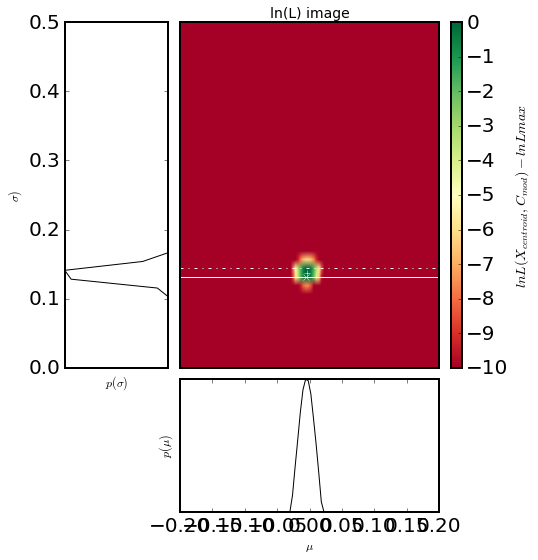

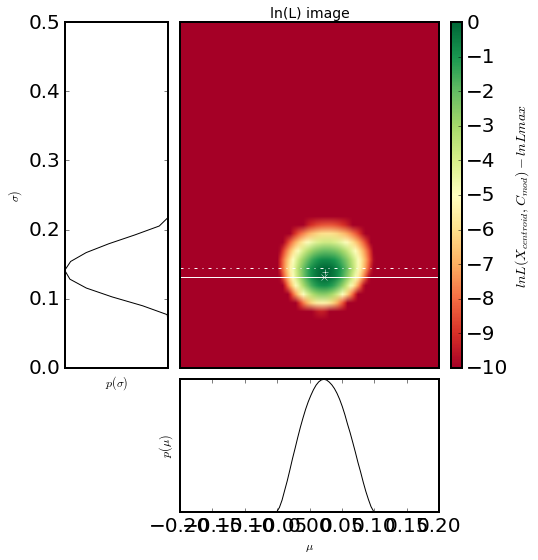

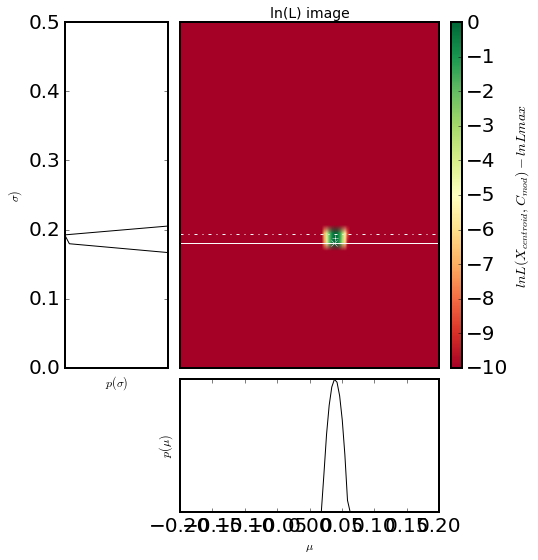

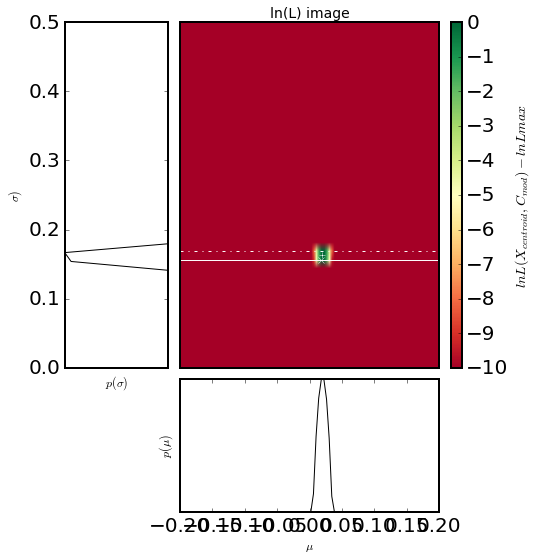

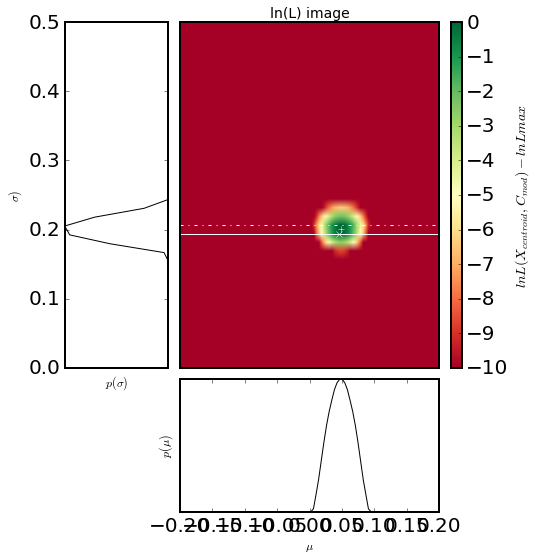

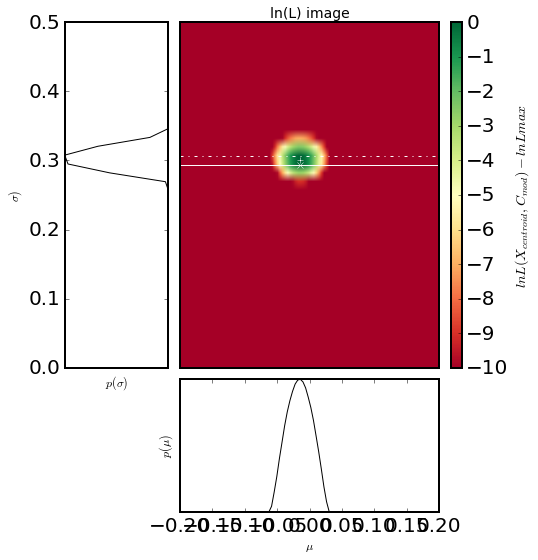

In [76]:

for key in files_sig.keys():
    
    obj = files_sig[key][0]
    mag = files_sig[key][1]
    corr = files_sig[key][2]
    pre = obj+'_bins_'+mag+corr
    
    for i in range(len(files_sig[key][3])):
        N = int(files_sig[key][3][i])
        bin_N = str(N).zfill(3)
        File= pre+'/'+obj+'_bin_'+bin_N+'_xi_ei'+mag+'.txt'
        print '\n'+File
        xi, ei= read_file(File)
        mu_bin, sigma_bin, logL_bin, mu, sigma = p_sigma_mu(xi,ei)
        name = obj+mag+corr+'_bin_'+bin_N+'.png'
        sig_max, sig_full= files_sig[key][4][i], files_sig[key][5][i]
        print('Sig max = %f , Sig full = %f ' % (sig_max, sig_full))
        
        # read in the mcmc result for that bin...
        mcmc_file = obj+'_bins_'+mag+corr+'_chains_res.txt'
        print 'Using mcmc result from ', mcmc_file
        mcmc_res = np.genfromtxt(mcmc_file)
        sig_mcmc = mcmc_res[:,2][mcmc_res[:,0] == N]
        mu_mcmc= mcmc_res[:,1][mcmc_res[:,0] == N]
        
        p_mu, p_sigma = chi2plotMarginalAstro(logL_bin, name, sig_full, sig_max, sig_mcmc, mu_mcmc)


In [66]:
sigma[p_sigma == max(p_sigma)]

array([ 0.20512821])

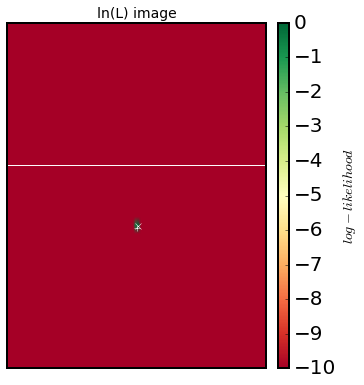

In [59]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.08, bottom=0.15, right=0.95, top=0.90, wspace=0.29, hspace=0.46)
lnL = logL_bin
lnL[lnL < -10] = -10  # truncate for clean plotting

## lnL image
ax = fig.add_axes([0.35, 0.35, 0.45, 0.6], xticks=[], yticks=[])
ax.set_title('ln(L) image', fontsize=14)
# pretty color map
plt.imshow(lnL, origin='lower', cmap=plt.cm.RdYlGn, aspect='auto')
# extent : left, right , bottom, top 
# colorbar
cax = plt.axes([0.82, 0.35, 0.02, 0.6])
cb = plt.colorbar(cax=cax)
cb.set_label(r'$log-likelihood$', fontsize=14)
plt.clim(np.min(lnL), np.max(lnL))

# mark max of logL 
ind = np.where(lnL == np.max(lnL))
# mu : ind[1][0]  ,  sig: ind[0][0]
# mu : 0-100   ,  sig : 0:40
ax.plot(ind[1][0],ind[0][0], 'x', color='white', alpha=0.99, lw=45)

ind_mm = np.interp(mu_mcmc, mu, np.arange(len(mu)))
ind_sm = np.interp(sig_mcmc, sigma, np.arange(len(sigma)))
ax.plot(ind_mm,ind_sm, '+', color='white', alpha=0.99, lw=45)

ind_s =  np.where(abs(sigma - sig_max) < 0.0001)
ax.axhline(y=ind_s[0][0], color='white', alpha=0.99)

#ind =  np.where(abs(sigma - sig_max) < 0.0001)
#ax.axhline(y=sigma[ind], color='white', alpha=0.99)
#ax.axhline(y=sig_max, color='white', alpha=0.99, lw=35)

In [46]:
ind_mm = np.where(abs(mu - mu_mcmc) < 0.01)
ind_sm = np.where(abs(sigma - sig_mcmc) < 0.01)

In [47]:
ind_mm

(array([48, 49, 50, 51, 52]),)

In [48]:
ind_sm

(array([15, 16]),)

In [51]:
np.arange(len(mu))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [52]:
ind_mm = np.around(np.interp(mu_mcmc, mu, np.arange(len(mu))),0)

In [55]:
ind_mm

array([ 49.53120148])

In [54]:
np.around(ind_mm, 0)

array([ 50.])

In [72]:
fname = 'QSO_bins_18.5-19_N_max_sig_full_sig.txt'


# check if the file exists
if os.path.exists(fname) : 
    num_lines = sum(1 for line in open(fname))

    if num_lines == 200 : 

        #print 'Reading in the results ...\n'
        d = np.genfromtxt(fname)
        N = d[:,0]
        sig_max = d[:,1]
        sig_full = d[:,2]

        a = np.where(sig_max - sig_full != 0)
        if np.size(a) > 0:
            print '\nFor ',  fname 
            print 'There is some discrepancy...'
            ind = a[0]
            print 'Affected bins: ', N[ind]
            for i in range(len(ind)):
                print sig_max[ind], sig_full[ind]
            files_sig[fname] = [obj,mag,corr,N[ind], sig_max[ind], sig_full[ind]]
# if not, go ahead with the comparison        


For  QSO_bins_18.5-19_N_max_sig_full_sig.txt
There is some discrepancy...
Affected bins:  [ 178.]
[ 0.29487179] [ 0.30769231]


In [69]:
sig_max

array([ 0.26923077,  0.26923077,  0.26923077,  0.24358974,  0.25641026,
        0.25641026,  0.25641026,  0.24358974,  0.25641026,  0.28205128,
        0.28205128,  0.28205128,  0.25641026,  0.26923077,  0.26923077,
        0.26923077,  0.28205128,  0.29487179,  0.30769231,  0.29487179,
        0.30769231,  0.29487179,  0.29487179,  0.29487179,  0.28205128,
        0.26923077,  0.28205128,  0.28205128,  0.26923077,  0.26923077,
        0.28205128,  0.26923077,  0.28205128,  0.28205128,  0.29487179,
        0.28205128,  0.28205128,  0.28205128,  0.29487179,  0.29487179,
        0.29487179,  0.29487179,  0.29487179,  0.32051282,  0.29487179,
        0.32051282,  0.28205128,  0.30769231,  0.28205128,  0.28205128,
        0.28205128,  0.28205128,  0.26923077,  0.28205128,  0.28205128,
        0.29487179,  0.28205128,  0.28205128,  0.28205128,  0.28205128,
        0.28205128,  0.28205128,  0.28205128,  0.29487179,  0.30769231,
        0.29487179,  0.28205128,  0.29487179,  0.29487179,  0.30

In [70]:
sig_full

array([ 0.26923077,  0.26923077,  0.26923077,  0.24358974,  0.25641026,
        0.25641026,  0.25641026,  0.24358974,  0.25641026,  0.28205128,
        0.28205128,  0.28205128,  0.25641026,  0.26923077,  0.26923077,
        0.26923077,  0.28205128,  0.29487179,  0.30769231,  0.29487179,
        0.30769231,  0.29487179,  0.30769231,  0.29487179,  0.28205128,
        0.26923077,  0.28205128,  0.28205128,  0.26923077,  0.26923077,
        0.28205128,  0.26923077,  0.28205128,  0.28205128,  0.29487179,
        0.28205128,  0.28205128,  0.28205128,  0.29487179,  0.29487179,
        0.29487179,  0.29487179,  0.29487179,  0.32051282,  0.29487179,
        0.32051282,  0.28205128,  0.30769231,  0.28205128,  0.28205128,
        0.28205128,  0.28205128,  0.26923077,  0.28205128,  0.28205128,
        0.29487179,  0.28205128,  0.28205128,  0.28205128,  0.28205128,
        0.28205128,  0.28205128,  0.28205128,  0.29487179,  0.30769231,
        0.29487179,  0.28205128,  0.29487179,  0.29487179,  0.30

In [71]:
sig_max - sig_full

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.01282051,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  